<a href="https://colab.research.google.com/github/niteshkumar0205/machine_learning_projects/blob/main/Day_13_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("/content/datasets_586_1114_zoo.csv")

In [3]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.shape

(101, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
data.describe

<bound method NDFrame.describe of     animal_name  hair  feathers  eggs  ...  tail  domestic  catsize  class_type
0      aardvark     1         0     0  ...     0         0        1           1
1      antelope     1         0     0  ...     1         0        1           1
2          bass     0         0     1  ...     1         0        0           4
3          bear     1         0     0  ...     0         0        1           1
4          boar     1         0     0  ...     1         0        1           1
..          ...   ...       ...   ...  ...   ...       ...      ...         ...
96      wallaby     1         0     0  ...     1         0        1           1
97         wasp     1         0     1  ...     0         0        0           6
98         wolf     1         0     0  ...     1         0        1           1
99         worm     0         0     1  ...     0         0        0           7
100        wren     0         1     1  ...     1         0        0           2

[101 

In [7]:
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [8]:
data["animal_name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [9]:
data["animal_name"].nunique()

100

In [10]:
data.drop('animal_name', axis = 1, inplace = True)



In [11]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
data['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


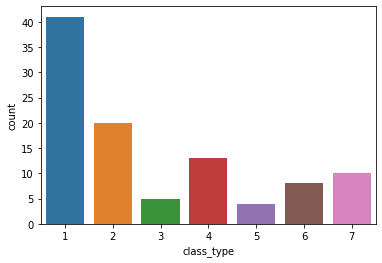

In [13]:
#Countplot based on class_type

sns.countplot(data['class_type'])

In [14]:
#We need to seperate class_1 from class_types to implement prediction model

class_1 = data[data['class_type'] == 1]

In [15]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
class_1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [17]:
class_1.nunique()

hair          2
feathers      1
eggs          2
milk          1
airborne      2
aquatic       2
predator      2
toothed       2
backbone      1
breathes      1
venomous      1
fins          2
legs          3
tail          2
domestic      2
catsize       2
class_type    1
dtype: int64

In [18]:
class_1['class_type'].value_counts()

1    41
Name: class_type, dtype: int64

In [19]:
#Split x and y variables as independent and dependent variablees

x = data.drop('class_type', axis = 1)
y = data['class_type']

In [20]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64

In [22]:
#Split the dataset into both training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [23]:

y_train.unique()

array([3, 1, 2, 4, 6, 7, 5])

In [24]:
y_test.unique()

array([5, 4, 1, 2, 7, 6])

In [25]:
#Build SVM algorithm

from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
#Predicting the training data

tr_predict = model.predict(x_train)


In [27]:
#Predicting the test data

ts_predict = model.predict(x_test)

In [28]:
#Get the accuracy score of each variable

from sklearn.metrics import accuracy_score

print("Training accuracy:", accuracy_score(y_train, tr_predict))
print("Testing accuracy:", accuracy_score(y_test, ts_predict))

Training accuracy: 0.9625
Testing accuracy: 1.0


In [29]:
#Implement K-fold cross validation

from sklearn.model_selection import cross_val_score

svc_model = SVC()

In [30]:

model_cv = cross_val_score(svc_model, x, y, cv = 4)
model_cv

array([0.92307692, 0.96      , 0.92      , 0.88      ])

In [31]:

model_cv.mean()

0.9207692307692308

In [32]:
#Changing the C Parameter

svc_c = SVC(C=10)
model_cv = cross_val_score(svc_c, x, y, cv = 4)

In [33]:
model_cv

array([0.96153846, 1.        , 0.92      , 0.96      ])

In [35]:
model_cv.mean()

0.9603846153846154

In [36]:
#Now give some kernal value to SVM. Default kernal value will be linear.

# Because it's most importnat thing to know about the data whether it is linear or non-linear

#If the data is non-linear(No relation between values), then we need to convert them to linear using , kernal functions

svc_c= SVC(C = 10, kernel= 'linear')

model_cv = cross_val_score(svc_c,x,y,  cv = 4)

model_cv.mean()


0.9303846153846154